## Python Assignment 
BCB546 Spring 2022

Sarah Minkler

Git hub repository: https://github.com/sminkler/BCB546-PythonHW_Spring2022.git

First, I downloaded the files from the class github repository using https://download-directory.github.io/. They are now present on my new repository.

In [1]:
pip install gitpython

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from git.repo.base import Repo
Repo.clone_from("https://github.com/sminkler/BCB546-PythonHW_Spring2022.git", "BCB546")

Cloning my new repository

In [2]:
cd BCB546

C:\Users\Sarah\Python Assignment\BCB546


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 00AC-9128

 Directory of C:\Users\Sarah\Python Assignment\BCB546

04/27/2022  01:28 PM    <DIR>          .
05/02/2022  04:36 PM    <DIR>          ..
04/27/2022  01:28 PM            14,955 penguins_cytb[1].fasta
04/27/2022  01:28 PM               318 penguins_mass[1].csv
04/27/2022  01:28 PM                58 README.md
04/27/2022  01:28 PM             3,330 README[1].md
04/27/2022  01:28 PM             6,810 sequence_translate[1].py
               5 File(s)         25,471 bytes
               2 Dir(s)  175,529,271,296 bytes free


Making sure I am in the right place, and my files are also here.

In [4]:
conda install biopython

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## FUNCTIONS 

In [5]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Data import CodonTable
import pandas as pd

# Function 1 
Dr. X: this gets sequences. Please properly document this function in the Jupyter notebook 
Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.

In [6]:
def get_sequences_from_file(fasta_fn): ## trying to obtain fasta sequences from the fasta file 
    sequence_data_dict = {} ## putting sequences in a dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [7]:
cytochromeB_seq= get_sequences_from_file("penguins_cytb[1].fasta") ## assigning to a dictionary
type(cytochromeB_seq) ## making sure it's a dictionary

dict

In [8]:
for key, value in cytochromeB_seq.items(): 
    print (key, ":", value)

Aptenodytes forsteri : ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATT

To complete this function I used https://biopython.org/wiki/SeqIO to understand more about SeqI0 parsing and also used the class tuitorial to create a dictionary in python.

## Function 2
Write a function that translates sequences.Allsequences start at codon position 1. 
Complete a function that translates using a loop over the string of nucleotides. 
Here is  some pseudo-code and suggestions. 
feel free to change the function and variable names. 


In [9]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #bringing in codon table
    aa_seq_string = ""
    for i in range(0, len(string_nucleotides)-3, 3): #counting every 3 nucleotides
        
        codon = string_nucleotides[i:i+3]
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa #putting amino acids and codons together
    return  aa_seq_string #give string of amino acids at the end

translate_function("CTGACAGGTATATTCATACCTCGGACTGTT") #checking to see if it works with random sequence 

'LTGMFMPRT'

In [10]:
translate_function("CTTTCGTCCGAAGATCCTTACCGGGGT") #double checking with another random sequence

'LSSEDPYR'

To learn more about the codon table I used this link from biopython https://biopython.org/docs/1.75/api/Bio.Data.CodonTable.html. I used this link from StackOverflow as well https://stackoverflow.com/questions/49073217/how-to-use-biopython-to-translate-a-series-of-dna-sequences-in-a-fasta-file-and.

## Function 3
Is there a better way to write the translation function? (Hint: yes there is.). Perhaps using available BioPython library utilities? Please also write this function.

In [11]:
def alt_translate(string_nucleotides):
    alt_aa_string = ""
    alt_aa_string =Seq.translate(string_nucleotides, table=2, to_stop=True) ##translates into amino acids and stops stop codon
    return alt_aa_string ##returns a string containing the translated amino acid sequence 

For the alternate function, I used the biopython tutorital to find another way to translate the sequence
http://biopython.org/DIST/docs/tutorial/Tutorial.html in the Seq.translation section.

## Function 4
Write a function that calculates the molecular weight of each amino acid sequence.
For this, you can use some BioPython functions. I think you can use the ProtParam module.
For more info, check this out: http://biopython.org/wiki/ProtParam
So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [12]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio import SeqIO ##importing necessary packages

In [21]:
def calc_molecular_weight(aa_seq): 
    analyzed_seq = ProteinAnalysis(aa_seq)
    return analyzed_seq.molecular_weight() ##returns the molecular weight

For function 4, I used this link http://biopython.org/wiki/ProtParam as mentioned above. 

## Function 5
Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [14]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import GC

In [67]:
def calc_GC_content(DNA_seq): ##inputing sequence
    return GC(DNA_seq) ##returns the GC content

I used this link from the biopython website to help with this function. https://biopython.org/docs/1.75/api/Bio.SeqUtils.html

## Main 

In [16]:
cytb_seqs = get_sequences_from_file("penguins_cytb[1].fasta") 
penguins_df = pd.read_csv("penguins_mass[1].csv") # Includes only data for body mass 
species_list = list(penguins_df.species) 

Above code coming from Dr. X's jupyter notebook

## Main 6
Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
Set the value to 'NaN' to indicate that these cells are currently empty.

In [17]:
import numpy as np
import pandas as pd

In [19]:
for index, row in penguins_df.iterrows():  ##creating for loops for each new row
    penguins_df.loc[index,'Molecular Weight'] = "NaN"  ##setting the values to be NaN
for index, row in penguins_df.iterrows():
    penguins_df.loc[index,'GC Content'] = "NaN"
penguins_df ##checking to make sure this is correct

,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


To add these columns into the dataframe I used the class tutiorials 

## Main 7

Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame.

In [23]:
row = 0
for i in penguins_df.species:  ##drawing from the penguins df
    aa_seq = alt_translate(str(cytb_seqs[i])) ##using my alternative translation function for this for loop
    mole_weight = calc_molecular_weight(str(aa_seq)) ##calculating the molecular weight
    GC_cont = calc_GC_content(str(cytb_seqs[i])) ##calculating the GC content
    penguins_df.iloc[row, penguins_df.columns.get_loc("Molecular Weight")] = mole_weight ##making new columns for both characteristics
    penguins_df.iloc[row, penguins_df.columns.get_loc("GC Content")] = GC_cont
    row += 1
penguins_df

,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


For this part of the assignment I used https://stackoverflow.com/questions/31569384/set-value-for-particular-cell-in-pandas-dataframe-with-iloc to add the columns to the dataframe with the corresponding values.

In [48]:
penguins_df ## Just wanted to double check that the columns looked correct again. 

,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


## Main 8 
Plot a bar-chart of the mass with the x-axes labeled with species names.
*Q1* What is the smallest penguin species? 
*Q2* What is the geographical range of this species?

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

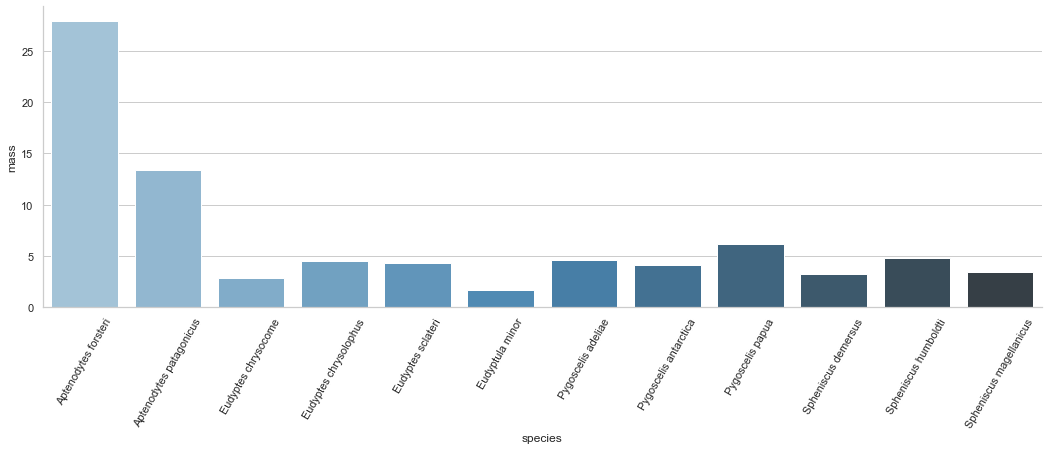

In [68]:
plot_dims = (14, 9)
Eight = sns.catplot(x = 'species', y = 'mass', kind="bar", aspect=3, data=penguins_df, palette="Blues_d") ##setting variables
ax.set(xlabel='Species ID', ylabel='Mass (kg)') ##setting labels
Eight.set_xticklabels(rotation=60)

To change the x-axis rotation I used this link; https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib.
To change the color pallete, I used this link https://seaborn.pydata.org/generated/seaborn.barplot.html.

Q1.Eudyptula minor
Q2.Eudyptula minor is found on the southern coast of Australia and the coasts of New Zealand. 
Citation for question 2: https://animaldiversity.org/accounts/Eudyptula_minor/#geographic_range

## Main 9 
Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

C:\Users\Sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


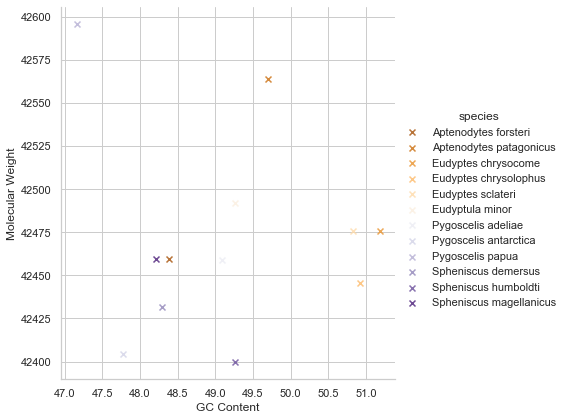

In [71]:
weight_GCplot = sns.lmplot("GC Content", "Molecular Weight", data=penguins_df, fit_reg=False, 
                       height=6, hue='species', markers='x', palette="PuOr")

To make graphs from 8 and 9, I used the class tuitorials and I changed the color pallette with this link https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn.

## Main 10 
Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [66]:
penguins_df.to_csv("penguins_mass_cytb.csv", sep=',', encoding='utf-8', index=False)

I used this link to save dataframe as csv file:https://medium.com/@kasiarachuta/importing-and-exporting-csv-files-in-python-7fa6e4d9f408

## Main 11 - BONUS
What else can we do with this dataset in Python? 
Add functions or anything that might be interesting and fun. (optional)

In [53]:
import seaborn as sns
sns.set_theme(style="whitegrid")

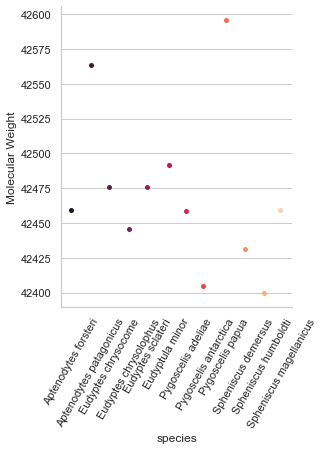

In [72]:
bonus = sns.catplot(x="species", y="Molecular Weight", data=penguins_df, palette= 'rocket')
bonus.set_xticklabels(rotation=60)

This doesn't really tell us anything new, I just wanted to show that all of the molecular weights of the proteins are really similar, with slight differences. Which we would expect them to be since they are all cytochrome B and these are all one animal, just different species.